# Credit Card Fraud Detection

In [118]:
!pip install imblearn

In [163]:
# Import necessary libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

In [164]:
# Set plot style
plt.style.use('ggplot')

In [165]:
# Turn off warnings
import warnings 
warnings.filterwarnings('ignore')

In [166]:
# Set font size for all plots
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [167]:
# Loading data
df = pd.read_csv('/Users/prachijajoo/Downloads/creditcard.csv')


In [168]:
# Printing random sample of 10 rows to check data loading
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244939,152544.0,1.976176,-0.545220,-0.444182,0.262301,-0.618691,-0.069907,-0.793378,0.157800,1.075353,...,0.267720,0.913090,0.074789,-0.422455,-0.238439,0.655596,-0.030744,-0.065749,7.50,0
281542,170252.0,-1.791497,-0.051034,3.067529,3.683853,-1.830843,2.302404,0.733966,0.340065,0.162149,...,-0.023135,0.511261,-0.344378,0.066365,0.377551,0.283631,0.094240,0.074318,383.69,0
112474,72663.0,-1.132306,-0.147834,0.850652,-0.401242,1.605976,4.819602,0.553589,1.178391,0.373419,...,-0.325316,-1.119478,0.214255,0.957637,0.747359,-0.609195,0.020016,0.080784,220.60,0
72512,54741.0,-1.531991,1.168877,1.154833,1.247909,-0.164851,0.310799,-0.174811,-0.418631,-0.057776,...,0.845058,-0.025864,-0.142814,0.180393,-0.250360,-0.320663,-0.606413,-0.177844,3.99,0
139515,83188.0,-2.146768,1.816012,0.311027,0.574572,-0.247061,0.003391,0.413552,0.364351,-0.115956,...,0.148239,0.699682,-0.084973,0.032784,-0.245538,-0.411436,-0.609587,-0.169491,36.74,0
197425,132009.0,-0.176598,0.448226,0.994209,0.657796,-0.229967,-0.143897,0.580855,0.148546,0.917290,...,-0.463537,-1.238426,0.299221,-0.173493,-0.664475,-1.178020,0.006841,0.038941,49.95,0
70661,53967.0,1.223865,-0.110011,0.564837,-0.101844,-0.630512,-0.563514,-0.284714,-0.021809,0.414877,...,-0.103031,-0.274854,0.120933,0.120075,0.035845,0.934290,-0.056764,0.007017,10.43,0
44372,41918.0,-1.085277,-2.100669,0.469678,-1.499453,-2.968474,0.114161,2.141281,-0.390980,-2.704495,...,0.116536,-0.547394,1.591145,0.249769,0.144223,-0.399160,-0.188967,0.075129,689.36,0
47085,43072.0,-0.864700,0.407531,1.760872,0.870292,0.729577,-1.074791,0.142694,-0.024824,-0.884989,...,-0.049682,-0.263558,0.186043,0.606767,-0.520408,0.186296,0.103343,0.159534,0.89,0
54124,46295.0,1.308134,-0.539184,-1.189267,-0.713143,1.664949,3.387965,-0.748591,0.768459,-1.197946,...,-0.564855,-1.415502,0.057083,0.924220,0.489799,-0.551192,0.038267,0.033057,52.98,0


In [169]:
# Printing data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [170]:
# Printing numerical summary for Time and Amount columns
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<Axes: title={'center': 'Time Distribution (Seconds)'}, xlabel='Time', ylabel='Density'>

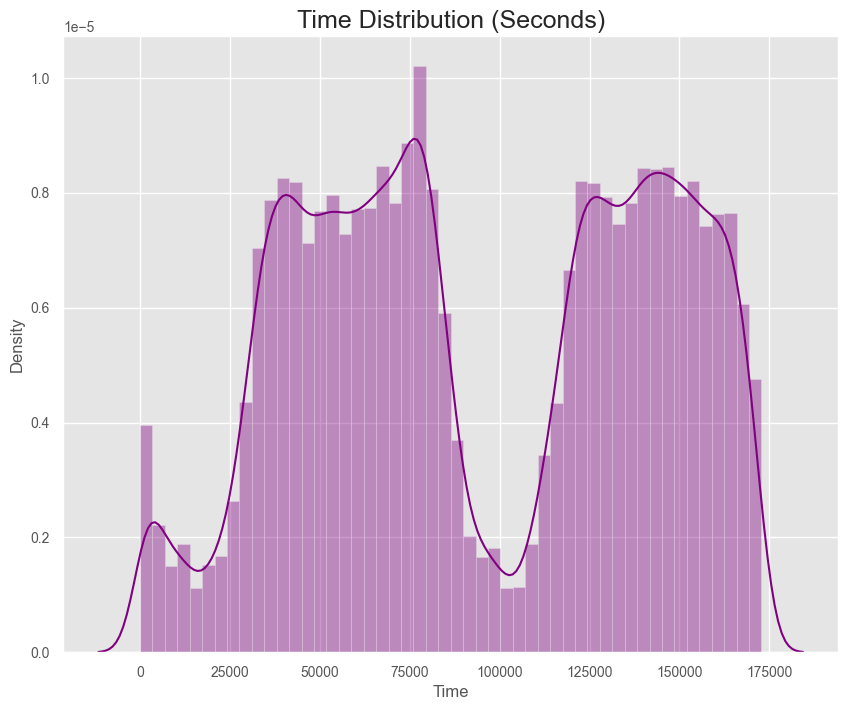

In [171]:
# Plotting distribution of Time feature
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], color='purple')

<Axes: title={'center': 'Distribution of Amount'}, xlabel='Amount', ylabel='Density'>

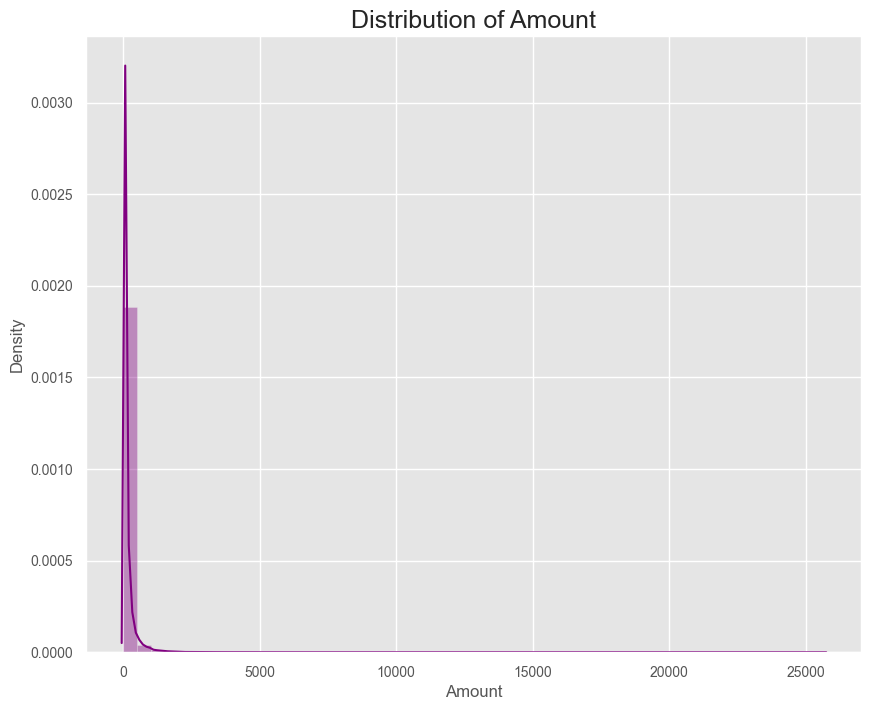

In [172]:
# Plotting distribution of Amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'], color='purple')

In [173]:
# Counting number of fraud vs non-fraud transactions and displaying them with their ratio
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]
print(f'Fraudulent: {fraud}, Non-fraudulent: {nonfraud}') 
print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Fraudulent: 492, Non-fraudulent: 284315
Ratio of fraud to non-fraud: 492/284315 (0.173%)


Text(0.5, 0, '0:Non-Fraudulent, 1:Fraudulent')

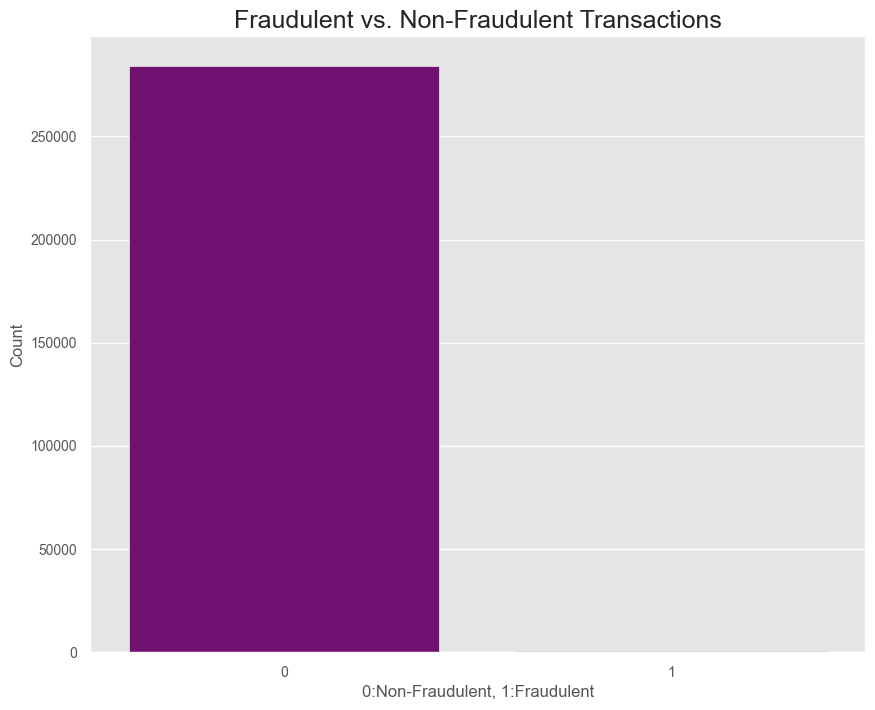

In [174]:
# Plotting count of fraud vs non-fraud transactions in a bar chart
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index,
y=df['Class'].value_counts(), color='purple')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')

<Axes: >

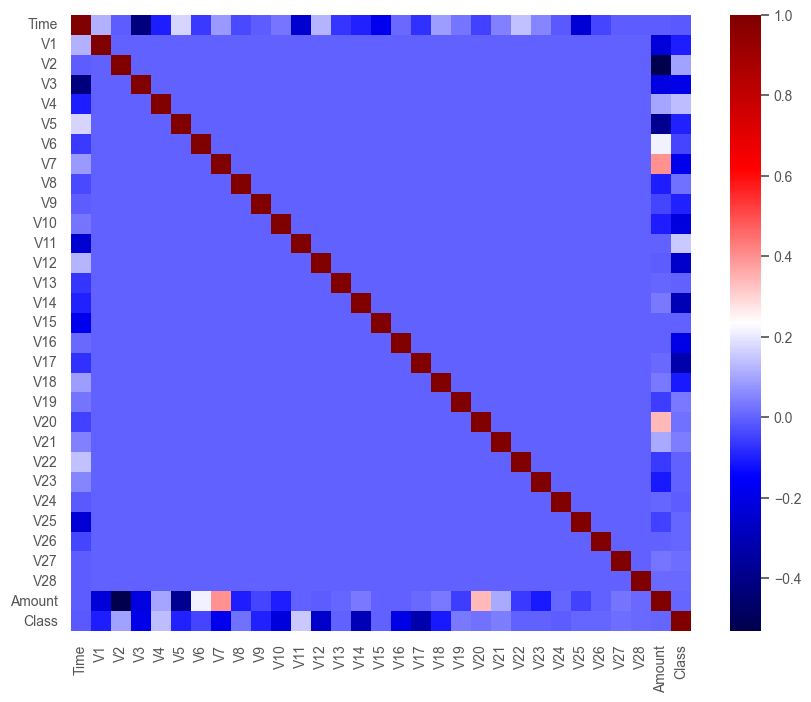

In [175]:
# Plotting heatmap to find any high correlations between variables
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), cmap="seismic", annot=False) # plt.show()

In [176]:
# Drop the 'Class' column to prepare data for splitting
data = df.drop(columns=['Class'])

In [177]:
# Get the target variable
answer = df['Class']

In [178]:
# Split data into training, validation and test sets, ensuring the class distribution is maintained
X_trainval, X_test, y_trainval, y_test = train_test_split(data, answer, test_size=0.2, stratify=df['Class'], random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify=y_trainval,test_size=0.25, random_state=42)

In [179]:
# Initialize the StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [180]:
# Scale the training, validation, and test sets using the scaler
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

In [181]:
# Undersampling will be utilized to address the issue of imbalanced classes.
# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [182]:
# Undersample the training set
X_train_under, y_train_under = rus.fit_resample(X_train_std, y_train)

In [183]:
# Undersample the validation set
X_val_under, y_val_under = rus.fit_resample(X_val_std, y_val)

In [200]:
# Logistic Regression
# Run CV with 5 folds (logit)
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5,scoring='roc_auc', verbose=10, n_jobs=-1) 
logistic_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

[CV 2/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 2/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.983 total time=   0.0s
[CV 5/5; 3/10] START C=464.15888336127773, penalty=l2...........................
[CV 5/5; 3/10] END C=464.15888336127773, penalty=l2;, score=0.988 total time=   0.0s
[CV 4/5; 4/10] START C=9999.999999999995, penalty=l2............................
[CV 4/5; 4/10] END C=9999.999999999995, penalty=l2;, score=0.958 total time=   0.1s
[CV 3/5; 6/10] START C=4641588.833612782, penalty=l2............................
[CV 3/5; 6/10] END C=4641588.833612782, penalty=l2;, score=0.986 total time=   0.0s
[CV 3/5; 7/10] START C=99999999.9999999, penalty=l2.............................
[CV 3/5; 7/10] END C=99999999.9999999, penalty=l2;, score=0.987 total time=   0.0s
[CV 3/5; 8/10] START C=2154434690.031878, penalty=l2............................
[CV 3/5; 8/10] END C=2154434690.031878, penalty=l2;, score=0.985 total time=   0.1s
[CV 5/5; 9/10

In [185]:
#Support Vector Machine (SVM)
# # Support Vector Machine (SVM) # # Run CV with 5 folds (SVM)
# C = [1]
# gammas = [0.001, 0.1]
# param_grid = dict(C=C, gamma=gammas)
# svm1 = svm.SVC(kernel='rbf', probability=True)
# svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
# svm_grid.fit(X_train_under, y_train_under)

In [186]:
# Naive Bayes
# Fit a Naive Bayes Model
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

In [187]:
# Random Forest
# Run CV with 5 folds (Random Forest)
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc',
verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

In [188]:
# Dummy Classifier
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)
DummyClassifier()

DummyClassifier()

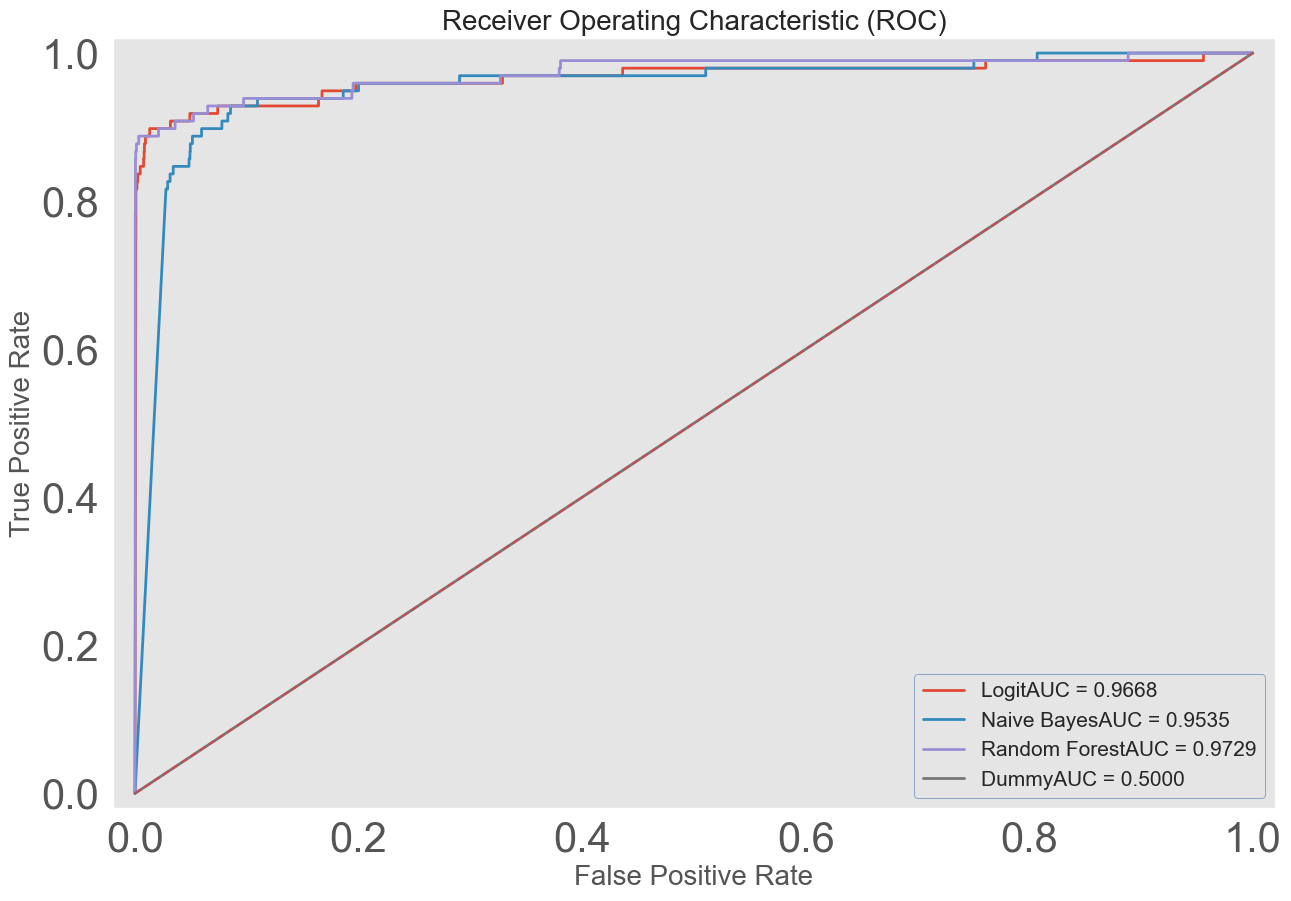

In [189]:
def plot_roc_curves(X, y, models, model_names, figsize=(15,10)):
    fig, ax = plt.subplots(figsize=figsize)
    # Loop over models and plot ROC curve
    for i, model in enumerate(models):
        y_pred = list(model.predict_proba(X)[:, 1])
        fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=(model_names[i] + 'AUC = %0.4f' %roc_auc), linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize=30, grid_color='r',
grid_alpha=0.5)
    
    leg = plt.legend(loc='lower right', prop={'size': 15})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=20)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)
    #plt.show()
# Define the list of models to compare
models = [logistic_grid.best_estimator_, gnb_best, rf_grid.best_estimator_, dummy]
model_names = ['Logit', 'Naive Bayes', 'Random Forest', 'Dummy']

# Plot ROC curves for out-of-sample data
plot_roc_curves(X_test_std, y_test, models, model_names)

In [190]:
# Define a function to find the best threshold for a given model
def find_best_threshold(model, num_steps): 
    highest_f1 = 0
    best_threshold = 0
    best_acc = 0
    best_rec = 0
    best_pre = 0
    # Iterate over a range of thresholds
    for threshold in np.linspace(0, 1, num_steps):
        # Predict the target variable using the given threshold 
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
        # Calculate various evaluation metrics
        f1 = f1_score(y_val_under, y_predict)
        acc = accuracy_score(y_val_under, y_predict)
        rec = recall_score(y_val_under, y_predict)
        pre = precision_score(y_val_under, y_predict)
        # Update the best threshold and metrics if F1 score improves if f1 > highest_f1:
        best_threshold, highest_f1, best_acc, best_rec, best_pre = threshold, f1, acc, rec, pre
    # Return the best threshold and evaluation metrics
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

# Define a list of models and their names
models = [logistic_grid, gnb_best, rf_grid]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest"]
# Create an empty list to store the results
chart = list()
# Iterate over the models and find the best threshold for each one
for item, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item, 20)
# Append the results to the chart list
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])
# Create a pandas dataframe from the chart list and display it
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
chart.to_csv('model_evaluation_scores.csv')
chart

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,1.0,0.828402,0.853535,0.707071,1.000000
1,Naive-Bayes,1.0,0.828729,0.843434,0.757576,0.914634
2,Random Forest,1.0,0.114286,0.530303,0.060606,1.000000


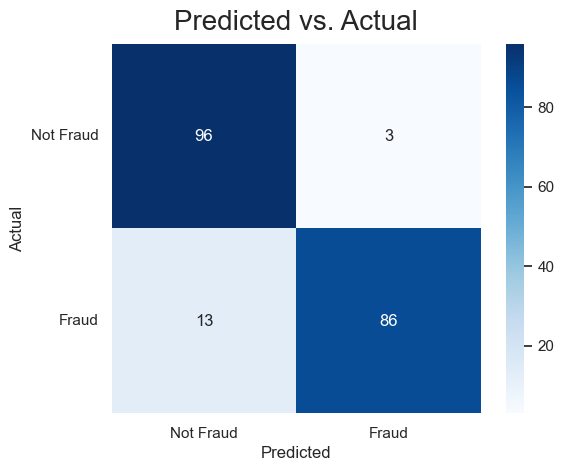

In [193]:
def make_confusion_matrix_val(model, threshold=0.5): 
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold) # calculate the confusion matrix
    fraud_confusion = confusion_matrix(y_val_under, y_predict)
    # plot the confusion matrix as heatmap
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud']);
    # calculate TP, FP, FN, and TN values from the confusion matrix
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    # rotate y-axis ticks
    plt.yticks(rotation = 0)
    # set plot title, x and y labels
    plt.title('Predicted vs. Actual',fontname = 'Arial',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
# Create a confusion matrix for the Random Forest model with a threshold of 0.421 on the validation data 
make_confusion_matrix_val(rf_grid, threshold=0.421)

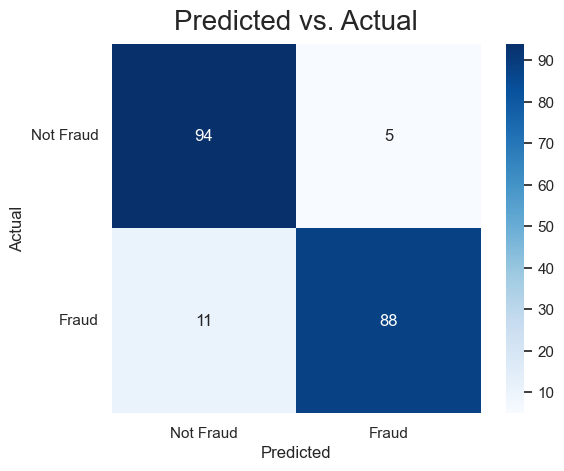

In [194]:
# Create a confusion matrix for the Logistic Regression model with a threshold of 0.842 on the validation data 
make_confusion_matrix_val(logistic_grid, threshold=0.842)

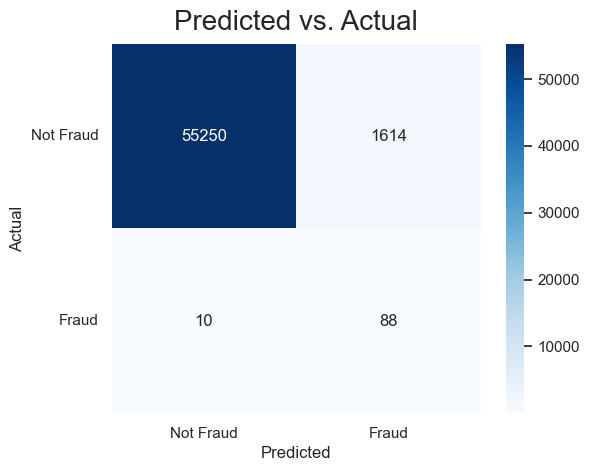

In [195]:
def make_confusion_matrix_test(model, threshold=0.5): 
    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold) # Generate confusion matrix
    fraud_confusion = confusion_matrix(y_test, y_predict)
    # Plot heatmap of confusion matrix
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    # Calculate TP, FP, FN, TN
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    # Add title, labels and rotate y-tick labels
    plt.yticks(rotation=0)
    plt.title('Predicted vs. Actual', fontname='Arial',
fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(rf_grid, threshold=0.421)

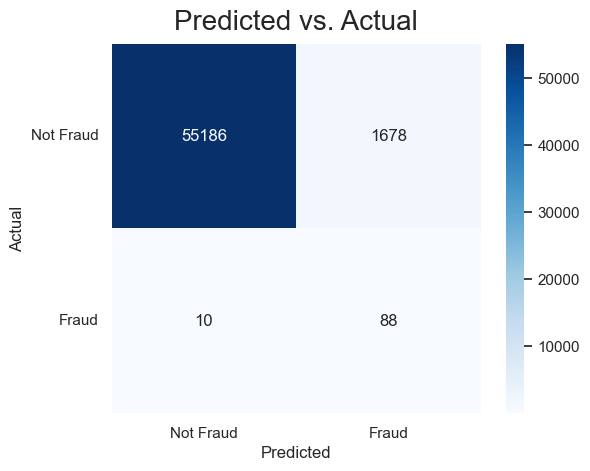

In [196]:
# Generate confusion matrix for logistic regression model on test dataset
make_confusion_matrix_test(logistic_grid, threshold=0.842)